In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from scipy.stats import chisquare

In [5]:
# Upload the dataset using the arrow on a sheet button
data = pd.read_csv('5000 Repositories.csv')

In [6]:
open_issues_count = data['open_issues_count']
open_issues_count.dropna()
print(open_issues_count.describe())

count    5000.000000
mean       11.779400
std        71.733026
min         1.000000
25%         1.000000
50%         2.000000
75%         7.000000
max      3317.000000
Name: open_issues_count, dtype: float64


Number of Samples 4777


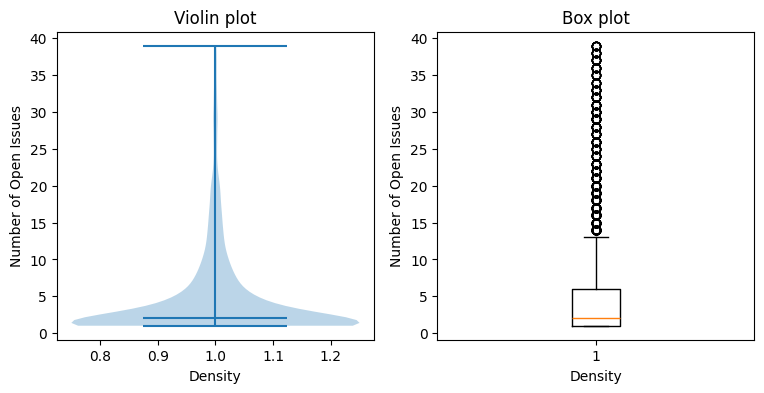

In [10]:
open_issues_count = open_issues_count.where(open_issues_count<40).dropna()
print('Number of Samples',len(open_issues_count))


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4))


axs[0].violinplot(open_issues_count,
                  showmeans=False,
                  showmedians=True)
axs[0].set_title('Violin plot')

axs[1].boxplot(open_issues_count)
axs[1].set_title('Box plot')

for ax in axs:
    ax.set_xlabel('Density')
    ax.set_ylabel('Number of Open Issues')

plt.show()

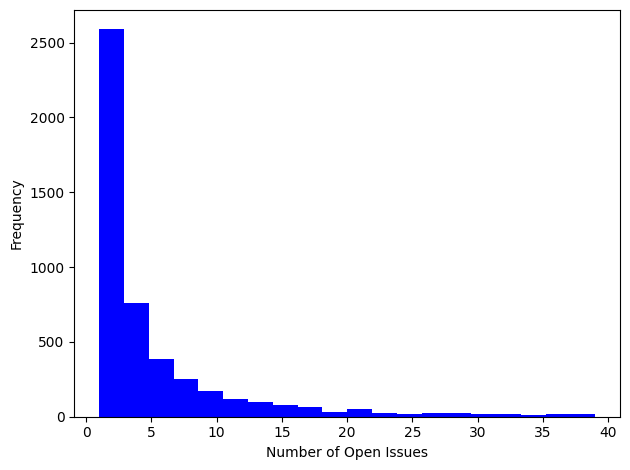

In [8]:
fig, ax = plt.subplots(sharey=True, tight_layout=True)

ax.hist(open_issues_count, bins=20, color = 'blue')
ax.set_ylabel('Frequency')
ax.set_xlabel('Number of Open Issues')

plt.show()

Number of Samples: 4833


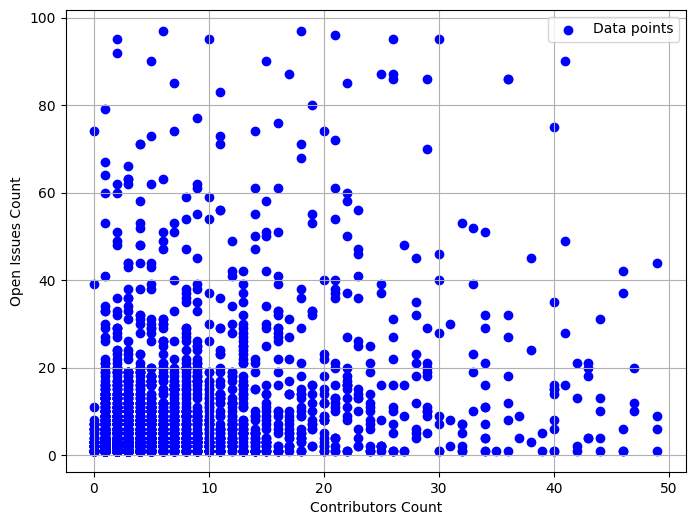

In [9]:
open_issues_contributors = data[['open_issues_count', 'contributors_count']]
open_issues_contributors = open_issues_contributors.where(
    (open_issues_contributors['open_issues_count']<100) &
    (open_issues_contributors['contributors_count']<50)
    ).dropna()

print('Number of Samples:',len(open_issues_contributors))

plt.figure(figsize=(8, 6))
plt.scatter(open_issues_contributors['contributors_count'], open_issues_contributors['open_issues_count'], color='blue', label='Data points')

plt.xlabel('Contributors Count')
plt.ylabel('Open Issues Count')
plt.legend()
plt.grid(True)